In [1]:
%matplotlib inline

In [2]:
import numpy as np
import iopro
import matplotlib.pyplot as plt
from custom_python_utilities.plot_format import create_single_figure, format_axes
from custom_python_utilities.histR import histR, histRec
from custom_python_utilities.corrgram import corrgram, corrgramRec

In [3]:
rf_arr = iopro.genfromtxt('rf_selected_candidates.csv',
                          delimiter=',',
                          missing_values='nan',
                          names=True)
eextra_arr = iopro.genfromtxt('eextra_selected_candidates.csv',
                              delimiter=',',
                              missing_values='nan',
                              names=True)

# Candidate Selection Comparison
+ Total number of signal events: 21431
+ Total number of signal events that has a truth matched candidate: 2309
+ Percentage of signal events that has a truth matched candidate: 10.8%

# Baseline Method: Minimum $E_{extra}$.
+ Total number of signal events that has a truth matched candidate: 2309
+ Total number of successful selections: 1285
+ Percentage of successful selections: 55.6%
+ Weighted Percentage of successful selections: 53.0%

# Improved Method: Max $Pr(truth match)$, learned from a classifier.
+ Total number of signal events that has a truth matched candidate: 2309
+ Total number of successful selections: 1997
+ Percentage of successful selections: 86.5%
+ Weighted Percentage of successful selections: 84.5%

### => 55-60% more successful selections. 

In [4]:
events, events_with_tm_cand = rf_arr.shape[0], np.count_nonzero(rf_arr['hot']==1)
rf_success_events = np.count_nonzero(rf_arr['truth_match']==1)

print events, events_with_tm_cand, rf_success_events, rf_success_events / float(events_with_tm_cand)

weighted_events, weighted_events_with_tm_cand = np.sum(rf_arr['event_weight']), np.sum(rf_arr['hot'] * rf_arr['event_weight'])
weighted_rf_success_events = np.sum(rf_arr['truth_match'] * rf_arr['event_weight'])

print weighted_events, weighted_events_with_tm_cand, weighted_rf_success_events, weighted_rf_success_events / weighted_events_with_tm_cand

21431 2309 1997 0.864876569944
242.33796 18.643147 15.744625 0.844526141429


In [5]:
events, events_with_tm_cand = eextra_arr.shape[0], np.count_nonzero(eextra_arr['hot']==1)
eextra_success_events = np.count_nonzero(eextra_arr['truth_match']==1)

print events, events_with_tm_cand, eextra_success_events, eextra_success_events / float(events_with_tm_cand)

weighted_events, weighted_events_with_tm_cand = np.sum(eextra_arr['event_weight']), np.sum(eextra_arr['hot'] * eextra_arr['event_weight'])
weighted_eextra_success_events = np.sum(eextra_arr['truth_match'] * eextra_arr['event_weight'])

print weighted_events, weighted_events_with_tm_cand, weighted_eextra_success_events, weighted_eextra_success_events / weighted_events_with_tm_cand

21431 2309 1285 0.556517973149
242.33796 18.643147 9.887122 0.530335463213


In [6]:
print float(rf_success_events-eextra_success_events) / eextra_success_events
print float(weighted_rf_success_events-weighted_eextra_success_events) / weighted_eextra_success_events

0.554085603113
0.592437617337


# Decision variable distributions. 
Given that an event has a truth matched candidate, plot the decision variable of the optimal candidate's.

### => Clear separation of successful vs unsuccessful choices for Pr(truth match).

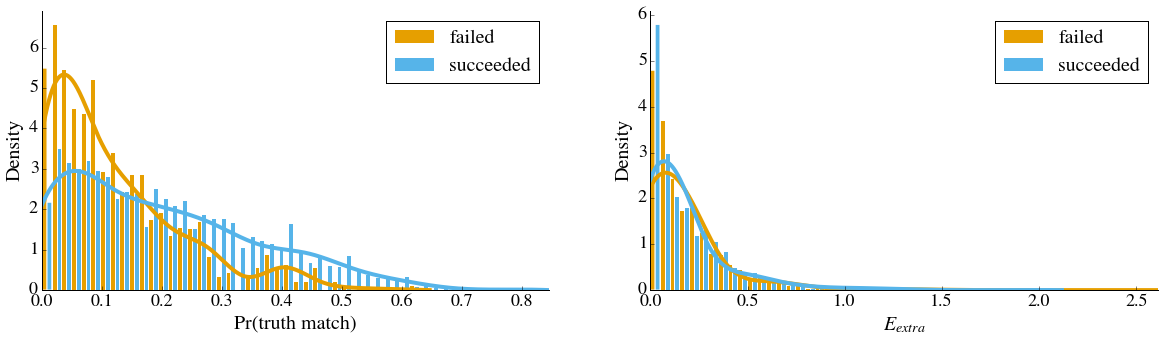

In [7]:
hot = (rf_arr['hot'] == 1) #| (rf_arr['hot'] == 0)
rf_arr_h, eextra_arr_h = rf_arr[hot], eextra_arr[hot]
fig = plt.figure(figsize=(20,5))
ax1 = format_axes(fig.add_subplot(1,2,1))
histRec(rf_arr_h, 'cand_score', weights='event_weight', Y='truth_match',
            bins=50, knots_spline=10,
            x_display_range=(0,None),
            show_hist=True,
            show_spline=True,
            normed=True,
            xlabel=r'Pr(truth match)',
            ylabel='Density',
            lw_spline=4,
            legend=True, legend_names=['failed', 'succeeded'],
            ax=ax1)
ax2 = format_axes(fig.add_subplot(1,2,2))
histRec(eextra_arr_h, 'eextra50', weights='event_weight', Y='truth_match',
            bins=50, knots_spline=10,
            x_display_range=(0,None),
            show_hist=True,
            show_spline=True,
            normed=True,
            xlabel=r'$E_{extra}$',
            ylabel='Density',
            lw_spline=4,
            legend=True, legend_names=['failed', 'succeeded'],
            ax=ax2)


# Variable Correlations

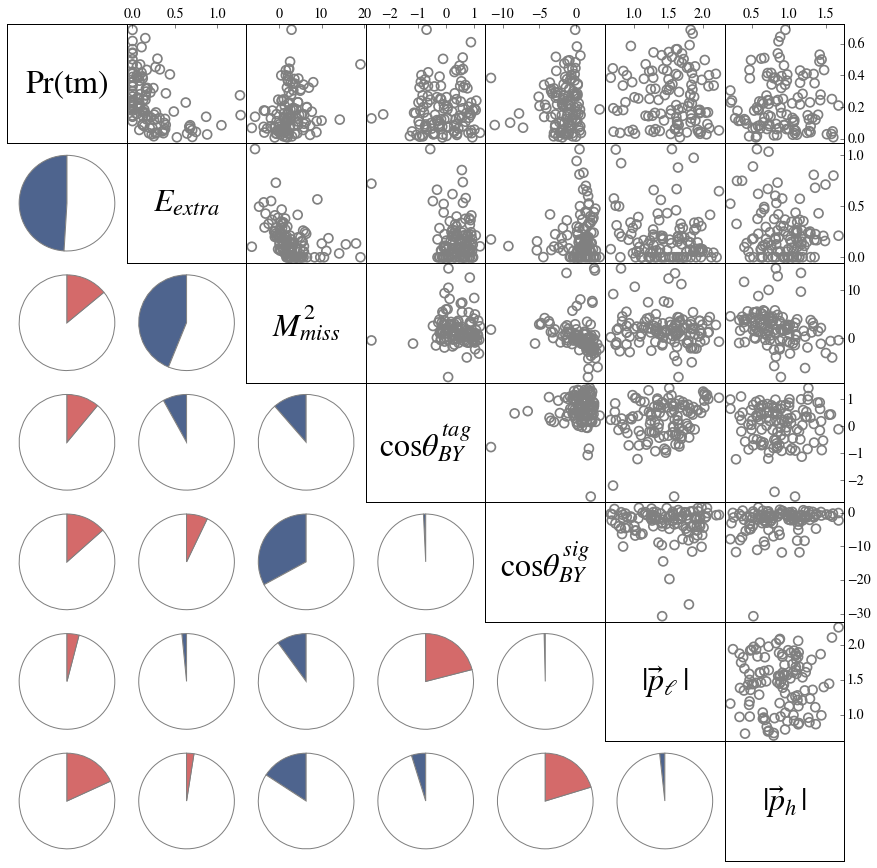

In [8]:
corrgramRec(rf_arr_h, figsize=(15,15),
            fields=['cand_score', 'eextra50', 'mmiss_prime2','tag_cosby','sig_cosby','tag_lp3', 'sig_hp3'],
            alias=['Pr(tm)', r'$E_{extra}$', r'$M^2_{miss}$', r'$\cos\theta^{tag}_{BY}$',r'$\cos\theta^{sig}_{BY}$',r'$|\vec{p}_\ell|$', r'$|\vec{p}_h|$'],
            undersample=[0.05]);

# Optimal candidate vs other candidates. 

+ $Dev_{opt}$: Absolute deviation (difference) of the optimal candidate score from the median candidate score. 
+ $MAD$: Median absolute deviation. 

### => The optimal candidate has a higher tendendency to be distinguished from the rest of the pack for Pr(truth match)

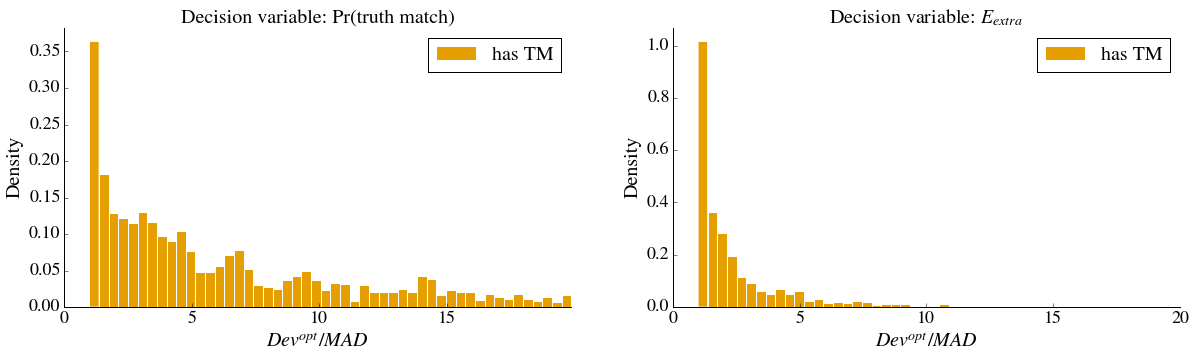

In [9]:
hot = (rf_arr['hot'] == 1)#| (rf_arr['hot'] == 0)
rf_m = hot & (rf_arr['opt_mad_dev'] < 20) & (rf_arr['opt_mad_dev'] >= 0)
eextra_m = hot & (eextra_arr['opt_mad_dev'] < 20) & (eextra_arr['opt_mad_dev'] >= 0)
rf_arr_h, eextra_arr_h = rf_arr[rf_m], eextra_arr[eextra_m]
fig = plt.figure(figsize=(20,5))
ax1 = format_axes(fig.add_subplot(1,2,1))
histRec(rf_arr_h, 'opt_mad_dev', weights='event_weight',
            bins=50, knots_spline=10,
            x_display_range=(0,None),
            normed=True,
            title=r'Decision variable: Pr(truth match)',
            xlabel=r'$Dev^{opt} / MAD$',
            ylabel='Density',
            lw_spline=4,
            legend=True, legend_names=['has TM'],
            ax=ax1)
ax2 = format_axes(fig.add_subplot(1,2,2))
histRec(eextra_arr_h, 'opt_mad_dev', weights='event_weight',
            bins=50, knots_spline=10,
            x_display_range=(0,None),
            normed=True,
            title=r'Decision variable: $E_{extra}$',
            xlabel=r'$Dev^{opt} / MAD$',
            ylabel='Density',
            legend=True, legend_names=['has TM'],
            ax=ax2)

# tag and signal D mode and D mass distribution differences. 

In [10]:
from IPython.display import display, Math, Latex
display(Math(r'1: D^+\rightarrow K^-\pi^+\pi^-'))
display(Math(r'2: D^+\rightarrow K^-\pi^+\pi^-\pi^0'))
display(Math(r'3: D^+\rightarrow K_s K^+'))
display(Math(r'4: D^+\rightarrow K_s\pi^+'))
display(Math(r'5: D^+\rightarrow K_s\pi^+\pi^0'))
display(Math(r'6: D^+\rightarrow K_s\pi^+\pi^-\pi^+'))
display(Math(r'7: D^+\rightarrow K^+K^-\pi^+'))
display(Math(r'8: D^0\rightarrow K^-\pi^+'))
display(Math(r'9: D^0\rightarrow K^-\pi^+\pi^0'))
display(Math(r'10: D^0\rightarrow K^-\pi^+\pi^+\pi^-'))
display(Math(r'11: D^0\rightarrow K^-\pi^+\pi^+\pi^-\pi^0'))
display(Math(r'12: D^0\rightarrow K_s\pi^+\pi^-'))
display(Math(r'13: D^0\rightarrow K_s\pi^+\pi^-\pi^0'))
display(Math(r'14: D^0\rightarrow K_s\pi^0'))
display(Math(r'15: D^0\rightarrow K^+K^-'))

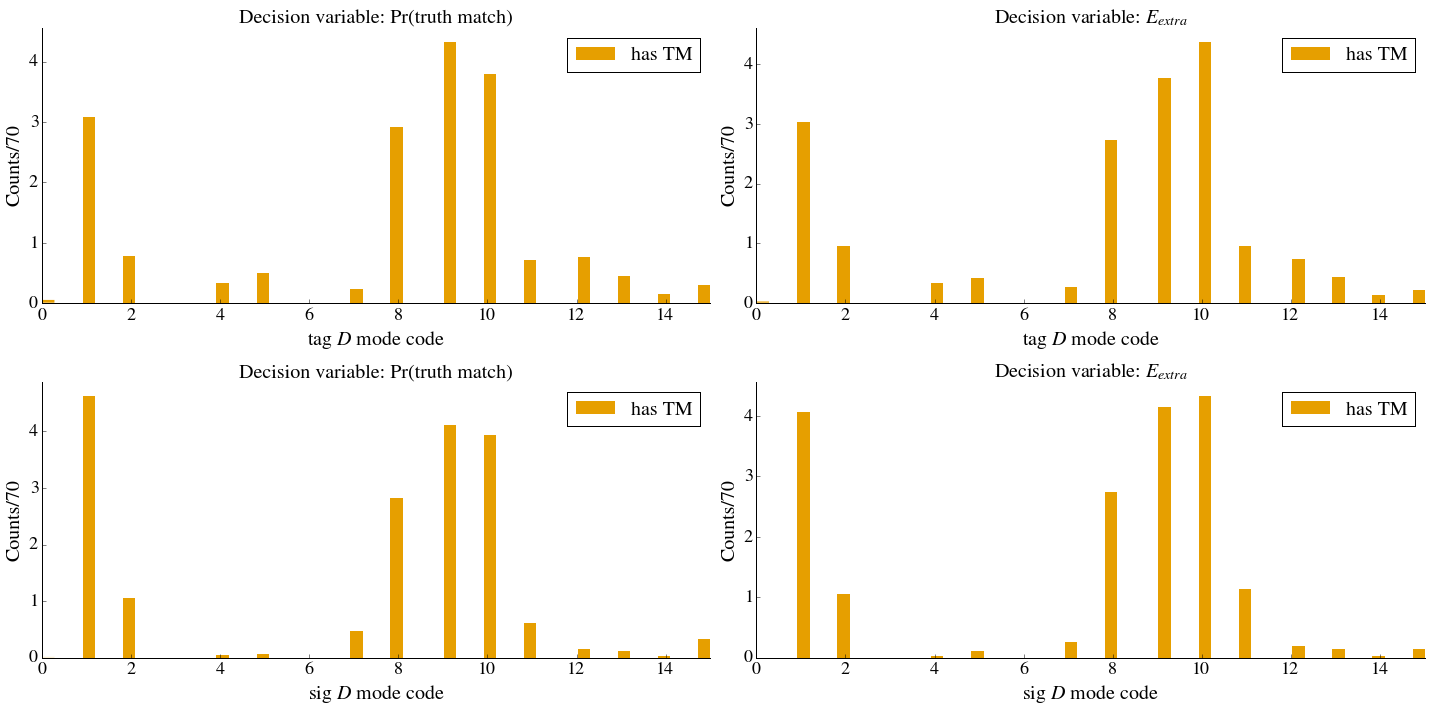

In [11]:
hot = (rf_arr['hot'] == 1) #& (rf_arr['n_cand'] > 1) | (rf_arr['hot'] == 0)
rf_arr_h, eextra_arr_h = rf_arr[hot], eextra_arr[hot]
fig = plt.figure(figsize=(20,10))
ax1 = format_axes(fig.add_subplot(2,2,1))
histRec(rf_arr_h, 'tag_dtype', weights='event_weight', 
            #Y='truth_match',
            bins=50, knots_spline=10,
            x_display_range=(0,None),
            show_hist=True,
            normed=False,
            title=r'Decision variable: Pr(truth match)',
            xlabel=r'tag $D$ mode code',
            ylabel=r'Counts/70',
            lw_spline=4,
            legend=True, legend_names=['has TM'],
            ax=ax1)
ax2 = format_axes(fig.add_subplot(2,2,2))
histRec(eextra_arr_h, 'tag_dtype', weights='event_weight', 
            #Y='truth_match',
            bins=50, knots_spline=10,
            x_display_range=(0,None),
            show_hist=True,
            normed=False,
            title=r'Decision variable: $E_{extra}$',
            xlabel=r'tag $D$ mode code',
            ylabel=r'Counts/70',
            lw_spline=4,
            legend=True, legend_names=['has TM'],
            ax=ax2)
ax3 = format_axes(fig.add_subplot(2,2,3))
histRec(rf_arr_h, 'sig_dtype', weights='event_weight', 
            #Y='truth_match',
            bins=50, knots_spline=10,
            x_display_range=(0,None),
            show_hist=True,
            normed=False,
            title=r'Decision variable: Pr(truth match)',
            xlabel=r'sig $D$ mode code',
            ylabel=r'Counts/70',
            lw_spline=4,
            legend=True, legend_names=['has TM'],
            ax=ax3)
ax4 = format_axes(fig.add_subplot(2,2,4))
histRec(eextra_arr_h, 'sig_dtype', weights='event_weight', 
            #Y='truth_match',
            bins=50, knots_spline=10,
            x_display_range=(0,None),
            show_hist=True,
            normed=False,
            title=r'Decision variable: $E_{extra}$',
            xlabel=r'sig $D$ mode code',
            ylabel=r'Counts/70',
            lw_spline=4,
            legend=True, legend_names=['has TM'],
            ax=ax4)
plt.tight_layout()

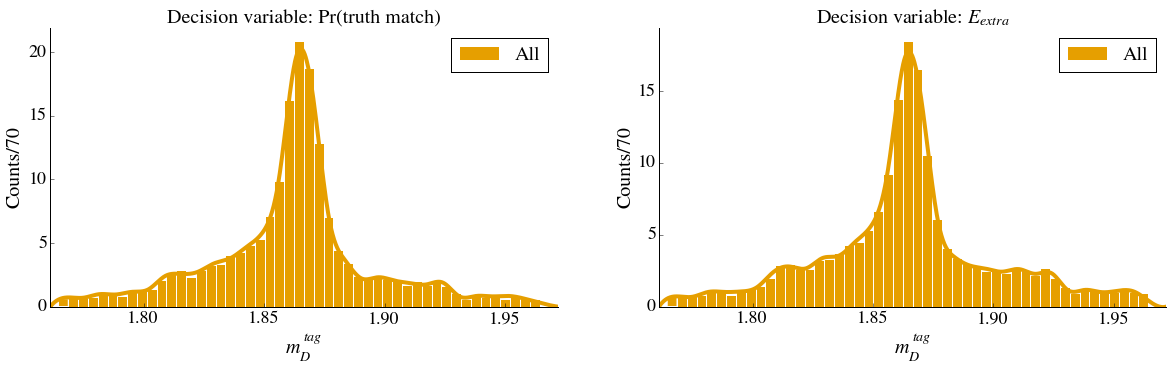

In [12]:
hot = (rf_arr['hot'] == 1) | (rf_arr['hot'] == 0)
rf_valid_dmass = ~np.isnan(rf_arr['tag_dmass'])
eextra_valid_dmass = ~np.isnan(eextra_arr['tag_dmass'])
rf_arr_h, eextra_arr_h = rf_arr[hot & rf_valid_dmass], eextra_arr[hot & eextra_valid_dmass]

fig = plt.figure(figsize=(20,5))
ax1 = format_axes(fig.add_subplot(1,2,1))
histRec(rf_arr_h, 'tag_dmass', weights='event_weight', 
            #Y='truth_match',
            bins=50, knots_spline=30,
            show_hist=True,
            show_spline=True,
            normed=False,
            title=r'Decision variable: Pr(truth match)',
            xlabel=r'$m^{tag}_D$',
            ylabel='Counts/70',
            lw_spline=4,
            legend=True, legend_names=['All'],
            ax=ax1)
ax2 = format_axes(fig.add_subplot(1,2,2))
histRec(eextra_arr_h, 'tag_dmass', weights='event_weight', 
            #Y='truth_match',
            bins=50, knots_spline=30,
            show_hist=True,
            show_spline=True,
            normed=False,
            title=r'Decision variable: $E_{extra}$',
            xlabel=r'$m^{tag}_D$',
            ylabel='Counts/70',
            lw_spline=4,
            legend=True, legend_names=['All'],
            ax=ax2)

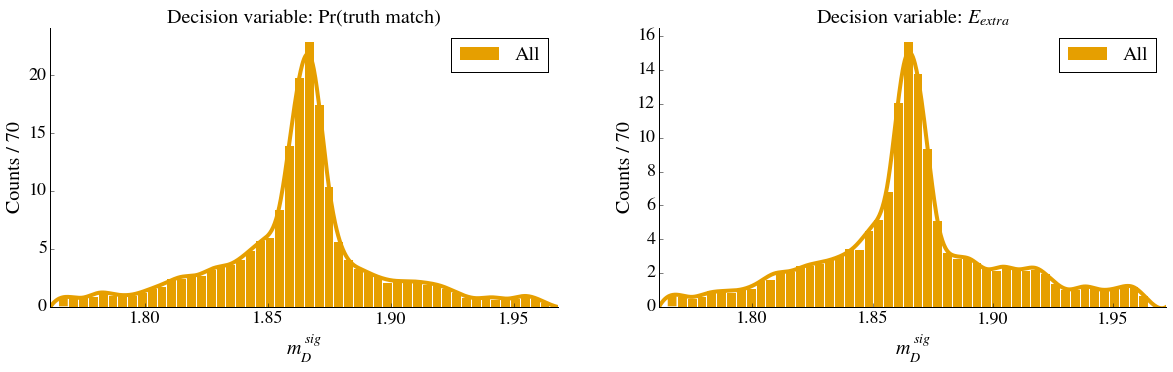

In [13]:
hot = (rf_arr['hot'] == 1) | (rf_arr['hot'] == 0)
rf_valid_dmass = ~np.isnan(rf_arr['sig_dmass'])
eextra_valid_dmass = ~np.isnan(eextra_arr['sig_dmass'])
rf_arr_h, eextra_arr_h = rf_arr[hot & rf_valid_dmass], eextra_arr[hot & eextra_valid_dmass]

fig = plt.figure(figsize=(20,5))
ax1 = format_axes(fig.add_subplot(1,2,1))
histRec(rf_arr_h, 'sig_dmass', weights='event_weight', 
            #Y='truth_match',
            bins=50, knots_spline=30,
            show_hist=True,
            show_spline=True,
            normed=False,
            title=r'Decision variable: Pr(truth match)',
            xlabel=r'$m^{sig}_D$',
            ylabel='Counts / 70',
            lw_spline=4,
            legend=True, legend_names=['All'],
            ax=ax1)
ax2 = format_axes(fig.add_subplot(1,2,2))
histRec(eextra_arr_h, 'sig_dmass', weights='event_weight', 
            #Y='truth_match',
            bins=50, knots_spline=30,
            show_hist=True,
            show_spline=True,
            normed=False,
            title=r'Decision variable: $E_{extra}$',
            xlabel=r'$m^{sig}_D$',
            ylabel='Counts / 70',
            lw_spline=4,
            legend=True, legend_names=['All'],
            ax=ax2)

# tag and signal D* mode and delta m distribution differences. 

In [14]:
#display(Math(r'0: \text{Not a }D^*\text{ meson}'))
display(Math(r'1: D^{*0}\rightarrow D^0\pi^0'))
display(Math(r'2: D^{*0}\rightarrow D^0\gamma'))
display(Math(r'3: D^{*+}\rightarrow D^0\pi^+'))
display(Math(r'4: D^{*+}\rightarrow D^+\pi^0'))

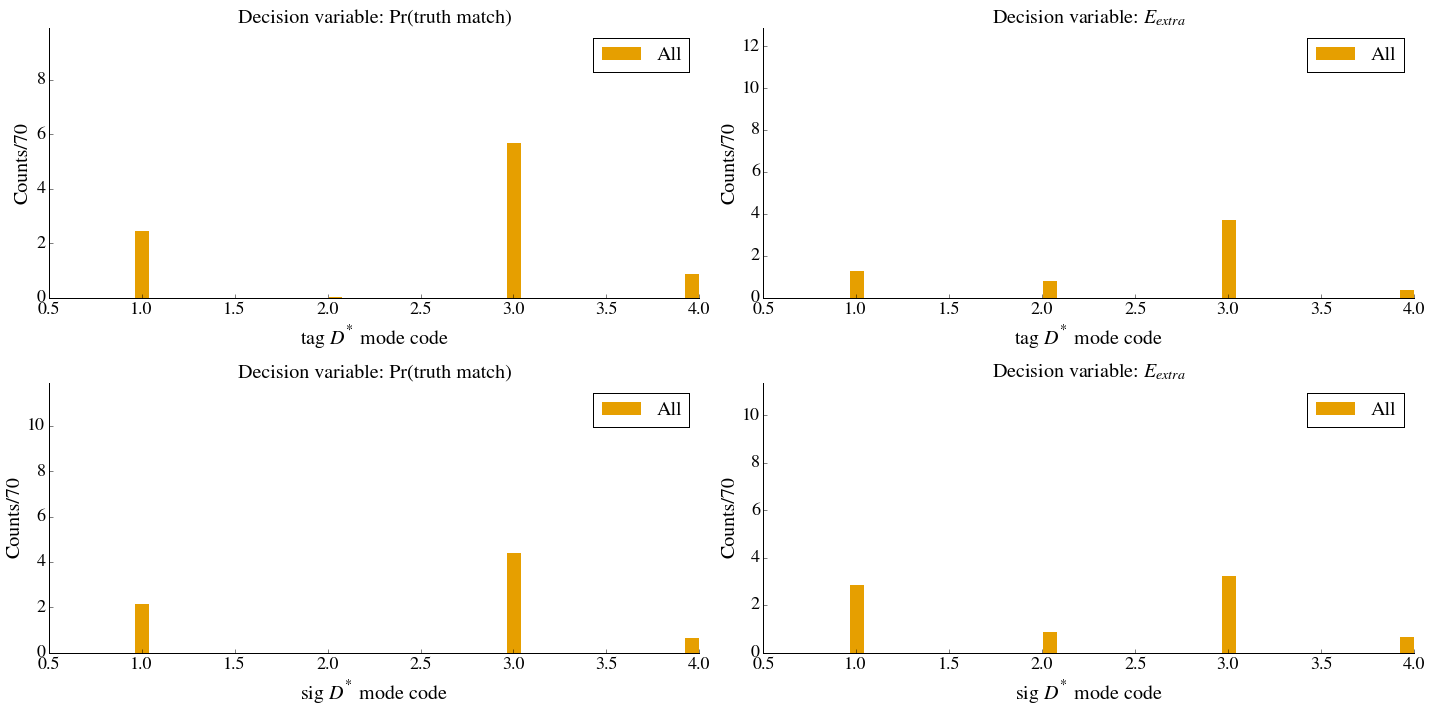

In [15]:
hot = (rf_arr['hot'] == 1) #& (rf_arr['n_cand'] > 1) | (rf_arr['hot'] == 0)
rf_arr_h, eextra_arr_h = rf_arr[hot], eextra_arr[hot]
fig = plt.figure(figsize=(20,10))
ax1 = format_axes(fig.add_subplot(2,2,1))
histRec(rf_arr_h, 'tag_dstartype', weights='event_weight', 
            #Y='truth_match',
            bins=50, knots_spline=10,
            x_display_range=(0.5,None),
            show_hist=True,
            normed=False,
            title=r'Decision variable: Pr(truth match)',
            xlabel=r'tag $D^*$ mode code',
            ylabel=r'Counts/70',
            lw_spline=4,
            legend=True, legend_names=['All'],
            ax=ax1)
ax2 = format_axes(fig.add_subplot(2,2,2))
histRec(eextra_arr_h, 'tag_dstartype', weights='event_weight', 
            #Y='truth_match',
            bins=50, knots_spline=10,
            x_display_range=(0.5,None),
            show_hist=True,
            normed=False,
            title=r'Decision variable: $E_{extra}$',
            xlabel=r'tag $D^*$ mode code',
            ylabel=r'Counts/70',
            lw_spline=4,
            legend=True, legend_names=['All'],
            ax=ax2)
ax3 = format_axes(fig.add_subplot(2,2,3))
histRec(rf_arr_h, 'sig_dstartype', weights='event_weight', 
            #Y='truth_match',
            bins=50, knots_spline=10,
            x_display_range=(0.5,None),
            show_hist=True,
            normed=False,
            title=r'Decision variable: Pr(truth match)',
            xlabel=r'sig $D^*$ mode code',
            ylabel=r'Counts/70',
            lw_spline=4,
            legend=True, legend_names=['All'],
            ax=ax3)
ax4 = format_axes(fig.add_subplot(2,2,4))
histRec(eextra_arr_h, 'sig_dstartype', weights='event_weight', 
            #Y='truth_match',
            bins=50, knots_spline=10,
            x_display_range=(0.5,None),
            show_hist=True,
            normed=False,
            title=r'Decision variable: $E_{extra}$',
            xlabel=r'sig $D^*$ mode code',
            ylabel=r'Counts/70',
            lw_spline=4,
            legend=True, legend_names=['All'],
            ax=ax4)
plt.tight_layout()

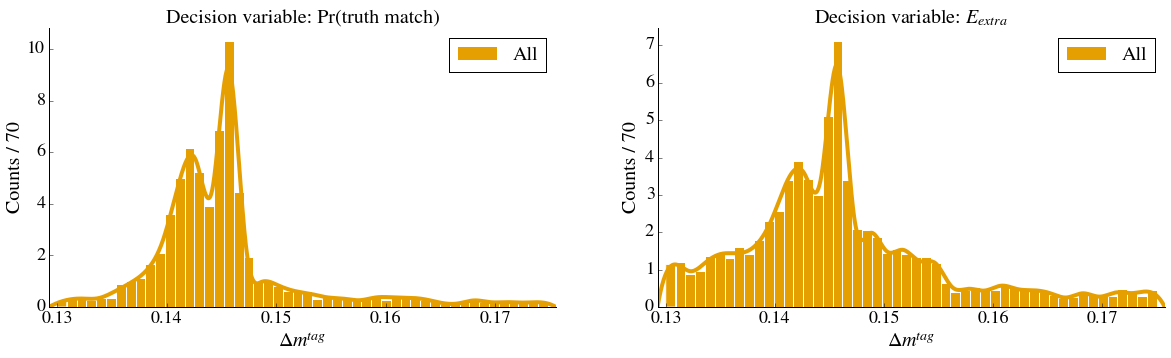

In [16]:
hot = (rf_arr['hot'] == 1) | (rf_arr['hot'] == 0)
rf_valid_dmass = ~np.isnan(rf_arr['tag_deltam'])
eextra_valid_dmass = ~np.isnan(eextra_arr['tag_deltam'])
rf_arr_h, eextra_arr_h = rf_arr[hot & rf_valid_dmass], eextra_arr[hot & eextra_valid_dmass]

fig = plt.figure(figsize=(20,5))
ax1 = format_axes(fig.add_subplot(1,2,1))
histRec(rf_arr_h, 'tag_deltam', weights='event_weight', 
            #Y='truth_match',
            bins=50, knots_spline=30,
            show_hist=True,
            show_spline=True,
            normed=False,
            title=r'Decision variable: Pr(truth match)',
            xlabel=r'$\Delta m^{tag}$',
            ylabel='Counts / 70',
            lw_spline=4,
            legend=True, legend_names=['All'],
            ax=ax1)
ax2 = format_axes(fig.add_subplot(1,2,2))
histRec(eextra_arr_h, 'tag_deltam', weights='event_weight', 
            #Y='truth_match',
            bins=50, knots_spline=30,
            show_hist=True,
            show_spline=True,
            normed=False,
            title=r'Decision variable: $E_{extra}$',
            xlabel=r'$\Delta m^{tag}$',
            ylabel='Counts / 70',
            lw_spline=4,
            legend=True, legend_names=['All'],
            ax=ax2)

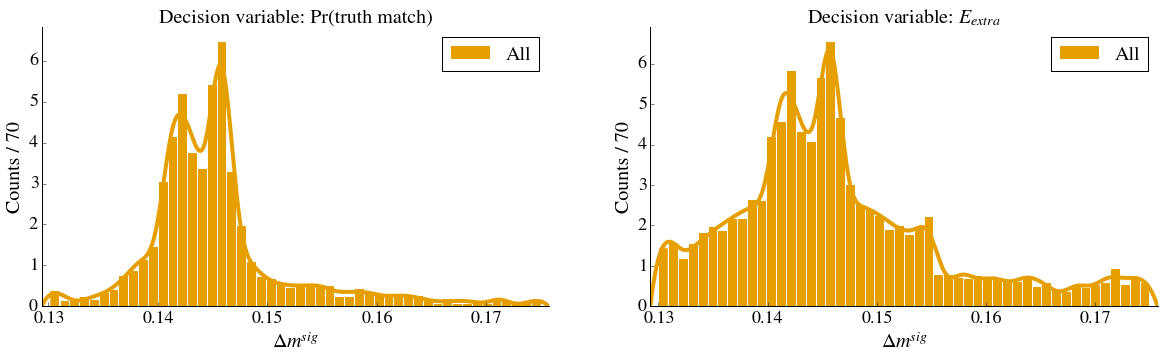

In [17]:
hot = (rf_arr['hot'] == 1) | (rf_arr['hot'] == 0)
rf_valid_dmass = ~np.isnan(rf_arr['sig_deltam'])
eextra_valid_dmass = ~np.isnan(eextra_arr['sig_deltam'])
rf_arr_h, eextra_arr_h = rf_arr[hot & rf_valid_dmass], eextra_arr[hot & eextra_valid_dmass]

fig = plt.figure(figsize=(20,5))
ax1 = format_axes(fig.add_subplot(1,2,1))
histRec(rf_arr_h, 'sig_deltam', weights='event_weight', 
            #Y='truth_match',
            bins=50, knots_spline=30,
            show_hist=True,
            show_spline=True,
            normed=False,
            title=r'Decision variable: Pr(truth match)',
            xlabel=r'$\Delta m^{sig}$',
            ylabel='Counts / 70',
            lw_spline=4,
            legend=True, legend_names=['All'],
            ax=ax1)
ax2 = format_axes(fig.add_subplot(1,2,2))
histRec(eextra_arr_h, 'sig_deltam', weights='event_weight', 
            #Y='truth_match',
            bins=50, knots_spline=30,
            show_hist=True,
            show_spline=True,
            normed=False,
            title=r'Decision variable: $E_{extra}$',
            xlabel=r'$\Delta m^{sig}$',
            ylabel='Counts / 70',
            lw_spline=4,
            legend=True, legend_names=['All'],
            ax=ax2)